# Exp 3: Image Processing in Frequency Domain and Image Restoration #
## 1.	Aims ##

#### 1. Understand the basic principles of Discrete Fourier Transform, and learn how to perform FFT and IFFT with Python.

#### 2. Be familiar with the image processing methods in the frequency domain, using Python to perform frequency domain filtering.
    
#### 3. Master the basic principles of image restoration, and learn some image restoration algorithms in Python

## 2.	Steps and Requirements

### (1) FFT and IFFT.	
(a) Load the image rhino.jpg, convert it to grayscale.

(b) Perform FFT. Shift the DC component to the center, and show the phase angles and the magnitudes.

(c) Perform IFFT and show the reconstructed image (Tips: remember to shift the DC component back). 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figures.

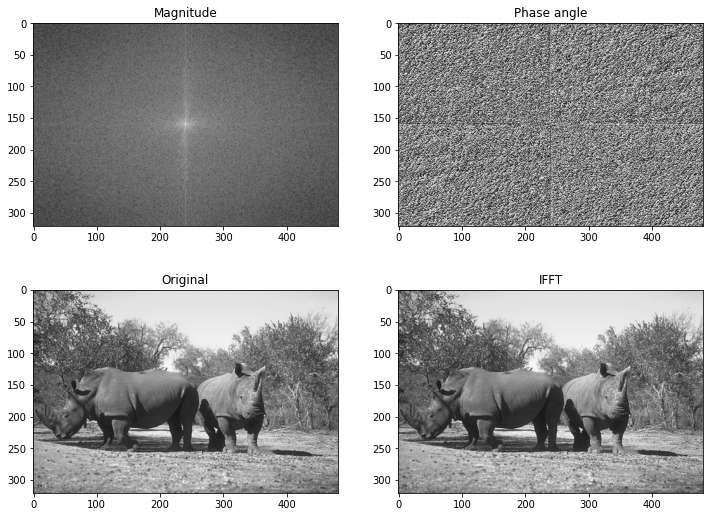

In [1]:
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load and convert to grayscale
img1 = io.imread('./images/rhino.jpg')
img1 = color.rgb2gray(img1)

# FFT and shift the DC component to center
img1_fft = np.fft.fft2(img1)
img1_fft_shift = np.fft.fftshift(img1_fft)

# Magnitude and phase angle
img1_mag = np.abs(img1_fft_shift)
img1_ang = np.angle(img1_fft_shift)

plt.figure(figsize=[12, 9])
plt.subplot(2, 2, 1)
plt.imshow(np.log(img1_mag), cmap='gray')
plt.title('Magnitude')
plt.subplot(2, 2, 2)
plt.imshow(img1_ang, cmap='gray')
plt.title('Phase angle')

# Shift the DC component back before IFFT
img1_ifft = np.fft.ifft2(np.fft.ifftshift(img1_fft_shift))
img1_ifft = np.real(img1_ifft)

plt.subplot(2, 2, 3)
plt.imshow(img1, cmap='gray')
plt.title('Original')
plt.subplot(2, 2, 4)
plt.imshow(img1_ifft, cmap='gray')
plt.title('IFFT')
plt.show()

### (2) Ideal Lowpass Filtering.	
(a) Load the image rhino.jpg. Convert it to grayscale.

(b) Perform FFT. 

(c) Design an ideal lowpass filter.

(d) Perform frequency domain filtering with the ideal lowpass filter.

(e) Display the original image, the filtered image, the original FFT magnitude, and filtered FFT magnitude in the same figure with sub-figures. Add the corresponding title to the sub-figure. Observe whether there is any ringing artifact in the filtered image. 

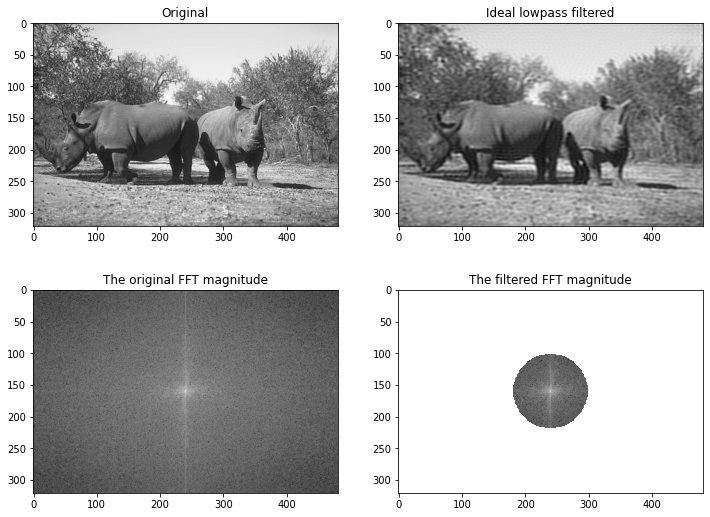

In [2]:
# Load, convert, perform FFT and shift
img2 = io.imread('./images/rhino.jpg')
img2 = color.rgb2gray(img2)
img2_fft = np.fft.fft2(img2)
img2_fft_shift = np.fft.fftshift(img2_fft)

# Design an ideal lowpass filter
# Calculate the distance
def dist(x, y):
    dis = np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
    return dis

# Create an ideal lowpass filter matrix
def ILP(height, width, d0):
    matrix = np.zeros((height, width))
    center = ((height-1)/2, (width-1)/2)
    for i in range(height):
        for j in range(width):
            dis = dist(center, (i, j))
            if dis < d0:
                matrix[i, j] = 1
    return matrix

# The ideal lowpass filter
def ILP_filter(img_fft_shift, d0):
    height, width = img_fft_shift.shape
    matrix = ILP(height, width, d0)
    filtered_fft_shift = img_fft_shift * matrix
    return filtered_fft_shift

# Perform filter
img2_filtered_fft_shift = ILP_filter(img2_fft_shift, 60)

# Magnitude
img2_mag = abs(img2_fft_shift)
img2_filtered_mag = abs(img2_filtered_fft_shift)

# Filtered image
img2_filtered_ifft = np.fft.ifft2(np.fft.ifftshift(img2_filtered_fft_shift))
img2_filtered_ifft = np.real(img2_filtered_ifft)

plt.figure(figsize=[12, 9])
plt.subplot(2, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original')
plt.subplot(2, 2, 2)
plt.imshow(img2_filtered_ifft, cmap='gray')
plt.title('Ideal lowpass filtered')
plt.subplot(2, 2, 3)
plt.imshow(np.log(img2_mag), cmap='gray')
plt.title('The original FFT magnitude')
plt.subplot(2, 2, 4)
plt.imshow(np.log(img2_filtered_mag), cmap='gray')
plt.title('The filtered FFT magnitude')
plt.show()

<font size=3 color=red>Since the amplitude is mainly concentrated in the low frequency, while the high frequency is basically zero. To make the amplitude plot look more recognizable, the amplitude values are taken logarithmically. However, in an ideal lowpass filter, the amplitude of the filtered part of the frequency is zero and cannot be taken as a logarithmic operation. Therefore, the white color at the periphery of the amplitude plot drawn here is the frequency with zero amplitude.</font>

### (3) Gaussian Lowpass Filter.	
(a) Load the image lena.jpg. Convert it to grayscale.

(b) Perform FFT.

(c) Perform Gaussian lowpass filtering.

(d) Display the original image, the filtered image, the original FFT magnitude, and filtered FFT magnitude in the same figure with sub-figures. Add the corresponding title to the sub-figure. Observe whether there is any ringing artifact in the filtered image. 

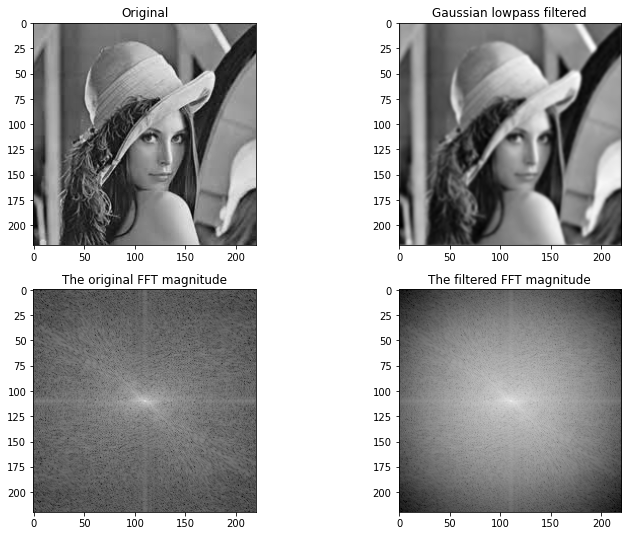

In [3]:
# Load, convert, perform FFT and shift
img3 = io.imread('./images/lena.jpg')
img3 = color.rgb2gray(img3)
img3_fft = np.fft.fft2(img3)
img3_fft_shift = np.fft.fftshift(img3_fft)

# Design a Gaussian lowpass filter
# Create a Gaussian lowpass filter matrix
def GLP(height, width, d0):
    matrix = np.zeros((height, width))
    center = ((height-1)/2, (width-1)/2)
    for i in range(height):
        for j in range(width):
            dis = dist(center, (i, j))
            matrix[i, j] = np.exp(-(dis**2) / (2*(d0**2)))
    return matrix

# The Gaussian lowpass filter
def GLP_filter(img_fft_shift, d0):
    height, width = img_fft_shift.shape
    matrix = GLP(height, width, d0)
    filtered_fft_shift = img_fft_shift * matrix
    return filtered_fft_shift

# Perform filter
img3_filtered_fft_shift = GLP_filter(img3_fft_shift, 30)

# Magnitude
img3_mag = abs(img3_fft_shift)
img3_filtered_mag = abs(img3_filtered_fft_shift)

# Filtered image
img3_filtered_ifft = np.fft.ifft2(np.fft.ifftshift(img3_filtered_fft_shift))
img3_filtered_ifft = np.real(img3_filtered_ifft)

plt.figure(figsize=[12, 9])
plt.subplot(2, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original')
plt.subplot(2, 2, 2)
plt.imshow(img3_filtered_ifft, cmap='gray')
plt.title('Gaussian lowpass filtered')
plt.subplot(2, 2, 3)
plt.imshow(np.log(img3_mag), cmap='gray')
plt.title('The original FFT magnitude')
plt.subplot(2, 2, 4)
plt.imshow(np.log(img3_filtered_mag), cmap='gray')
plt.title('The filtered FFT magnitude')
plt.show()

### (4) Butterworth Lowpass Filter.	
(a) Load the RGB image lena.jpg.

(b) Perform FFT. (Note that when using color images, pay attention to the parameter <font style="color:red;">axes</font> of functions such as fft, ifft, fftshift and ifftshift)

(c) Design three Butterworth lowpass filters with different cutoff frequencies $D_0$ and orders $n$ (cut-off frequency $D_0$ and order $n$ are free to choose).

(d) Perform frequency domain filtering with the designed Butterworth lowpass filters.

(e) Obtain filtered images with IFFT.

(f) Display the original image and the filtered images in the same figure with sub-figures. Observe their differences. Add the corresponding title to the sub-figures.


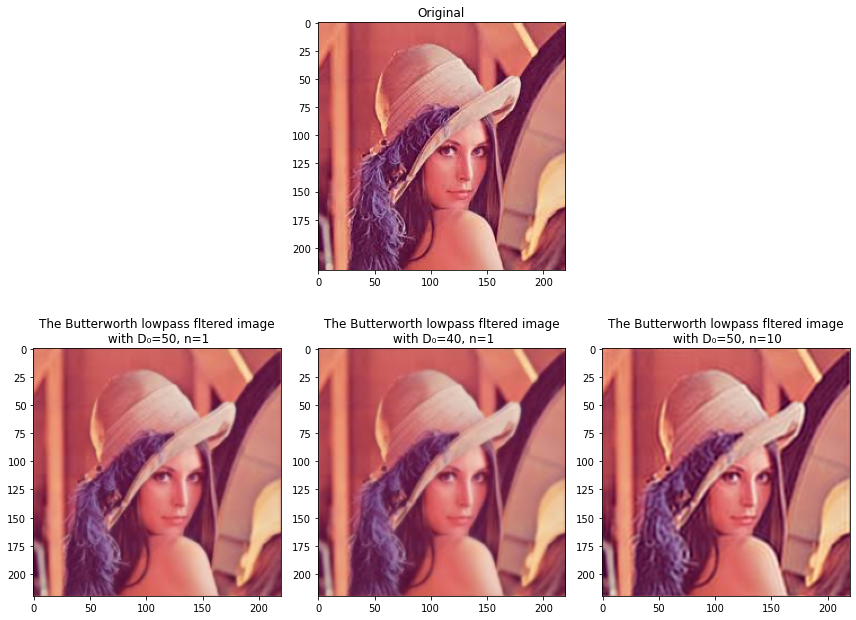

In [4]:
from skimage import img_as_float
import copy

# Load, change type, perform FFT and shift
img4 = io.imread('./images/lena.jpg')
img4 = img_as_float(img4)
img4_fft = np.fft.fft2(img4, axes=(0, 1))
img4_fft_shift = np.fft.fftshift(img4_fft, axes=(0, 1))

# Design a Butterworth lowpass filter
# Create a Butterworth lowpass filter matrix
def BWLP(height, width, d0, n):
    matrix = np.zeros((height, width))
    center = ((height-1)/2, (width-1)/2)
    for i in range(height):
        for j in range(width):
            dis = dist(center, (i, j))
            matrix[i, j] = 1 / (1 + (dis/d0)**(2*n))
    return matrix

# The Butterworth lowpass filter
def BWLP_RGB_filter(img_fft_shift, d0, n):
    height, width, channel = img_fft_shift.shape
    matrix = BWLP(height, width, d0, n)
    filtered_fft_shift = copy.deepcopy(img_fft_shift)
    for i in range(channel):
        filtered_fft_shift[:, :, i] = img_fft_shift[:, :, i] * matrix
    return filtered_fft_shift

# Perform filter
img4_filtered_fft_shift_1 = BWLP_RGB_filter(img4_fft_shift, 50, 1)
img4_filtered_fft_shift_2 = BWLP_RGB_filter(img4_fft_shift, 40, 1)
img4_filtered_fft_shift_3 = BWLP_RGB_filter(img4_fft_shift, 50, 10)

# Obtain filtered images with IFFT
img4_filtered_ifft_1 = np.fft.ifft2(np.fft.ifftshift(img4_filtered_fft_shift_1, axes=(0, 1)), axes=(0, 1))
img4_filtered_ifft_2 = np.fft.ifft2(np.fft.ifftshift(img4_filtered_fft_shift_2, axes=(0, 1)), axes=(0, 1))
img4_filtered_ifft_3 = np.fft.ifft2(np.fft.ifftshift(img4_filtered_fft_shift_3, axes=(0, 1)), axes=(0, 1))
img4_filtered_ifft_1 = np.clip(np.real(img4_filtered_ifft_1), 0, 1)
img4_filtered_ifft_2 = np.clip(np.real(img4_filtered_ifft_2), 0, 1)
img4_filtered_ifft_3 = np.clip(np.real(img4_filtered_ifft_3), 0, 1)

plt.figure(figsize=[12, 9])
plt.subplot(2, 3, 2)
plt.imshow(img4)
plt.title('Original')
plt.subplot(2, 3, 4)
plt.imshow(img4_filtered_ifft_1)
plt.title('The Butterworth lowpass fltered image\n with D\u2080=50, n=1')
plt.subplot(2, 3, 5)
plt.imshow(img4_filtered_ifft_2)
plt.title('The Butterworth lowpass fltered image\n with D\u2080=40, n=1')
plt.subplot(2, 3, 6)
plt.imshow(img4_filtered_ifft_3)
plt.title('The Butterworth lowpass fltered image\n with D\u2080=50, n=10')
plt.tight_layout()
plt.show()

### (5) Butterworth Highpass Filter.	
(a) Load the RGB image lena.jpg.

(b) Perform FFT. (Note that when using color images, pay attention to the parameter <font style="color:red;">axes</font> of functions such as fft, ifft, fftshift and ifftshift)

(c) Design three Butterworth highpass filters with different cutoff frequencies $D_0$ and orders $n$ (cut-off frequency $D_0$ and order $n$  are free to choose).

(d) Perform frequency domain filtering with the designed Butterworth highpass filters.

(e) Obtain filtered images with IFFT.

(f) Display the original image and the filtered images in the same figure with sub-figures. Observe their differences. Add the corresponding title to the sub-figures.

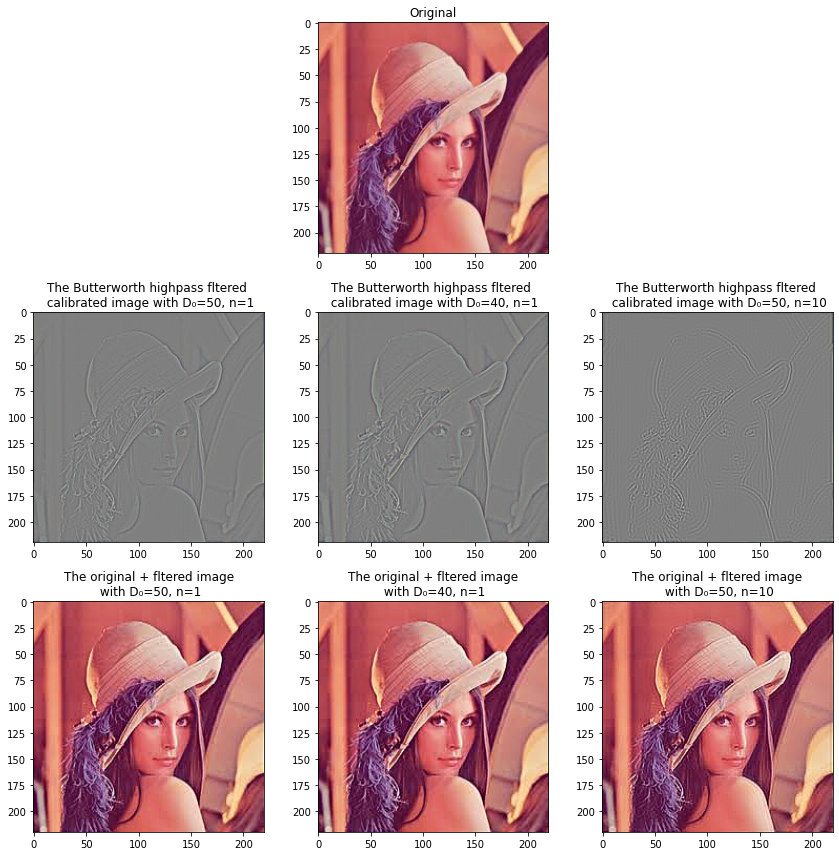

In [5]:
# Load, change type, perform FFT and shift
img5 = io.imread('./images/lena.jpg')
img5 = img_as_float(img5)
img5_fft = np.fft.fft2(img5, axes=(0, 1))
img5_fft_shift = np.fft.fftshift(img5_fft, axes=(0, 1))

# Design a Butterworth highpass filter
# Create a Butterworth highpass filter matrix
def BWHP(height, width, d0, n):
    matrix = np.zeros((height, width))
    center = ((height-1)/2, (width-1)/2)
    for i in range(height):
        for j in range(width):
            dis = dist(center, (i, j))
            matrix[i, j] = 1 / (1 + (d0/dis)**(2*n))
    return matrix

# The Butterworth highpass filter
def BWHP_RGB_filter(img_fft_shift, d0, n):
    height, width, channel = img_fft_shift.shape
    matrix = BWHP(height, width, d0, n)
    filtered_fft_shift = copy.deepcopy(img_fft_shift)
    for i in range(channel):
        filtered_fft_shift[:, :, i] = img_fft_shift[:, :, i] * matrix
    return filtered_fft_shift

# Perform filter
img5_filtered_fft_shift_1 = BWHP_RGB_filter(img5_fft_shift, 50, 1)
img5_filtered_fft_shift_2 = BWHP_RGB_filter(img5_fft_shift, 40, 1)
img5_filtered_fft_shift_3 = BWHP_RGB_filter(img5_fft_shift, 50, 10)

# Obtain filtered images with IFFT
img5_filtered_ifft_1 = np.fft.ifft2(np.fft.ifftshift(img5_filtered_fft_shift_1, axes=(0, 1)), axes=(0, 1))
img5_filtered_ifft_2 = np.fft.ifft2(np.fft.ifftshift(img5_filtered_fft_shift_2, axes=(0, 1)), axes=(0, 1))
img5_filtered_ifft_3 = np.fft.ifft2(np.fft.ifftshift(img5_filtered_fft_shift_3, axes=(0, 1)), axes=(0, 1))
img5_filtered_ifft_1 = np.clip(np.real(img5_filtered_ifft_1), -0.5, 0.5)
img5_filtered_ifft_2 = np.clip(np.real(img5_filtered_ifft_2), -0.5, 0.5)
img5_filtered_ifft_3 = np.clip(np.real(img5_filtered_ifft_3), -0.5, 0.5)

plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 2)
plt.imshow(img5)
plt.title('Original')
plt.subplot(3, 3, 4)
plt.imshow(img5_filtered_ifft_1 + 0.5)
plt.title('The Butterworth highpass fltered \n calibrated image with D\u2080=50, n=1')
plt.subplot(3, 3, 5)
plt.imshow(img5_filtered_ifft_2 + 0.5)
plt.title('The Butterworth highpass fltered \n calibrated image with D\u2080=40, n=1')
plt.subplot(3, 3, 6)
plt.imshow(img5_filtered_ifft_3 + 0.5)
plt.title('The Butterworth highpass fltered \n calibrated image with D\u2080=50, n=10')
plt.subplot(3, 3, 7)
plt.imshow(np.clip(img5 + img5_filtered_ifft_1, 0, 1))
plt.title('The original + fltered image\n with D\u2080=50, n=1')
plt.subplot(3, 3, 8)
plt.imshow(np.clip(img5 + img5_filtered_ifft_2, 0, 1))
plt.title('The original + fltered image\n with D\u2080=40, n=1')
plt.subplot(3, 3, 9)
plt.imshow(np.clip(img5 + img5_filtered_ifft_3, 0, 1))
plt.title('The original + fltered image\n with D\u2080=50, n=10')
plt.tight_layout()
plt.show()

### (6) Motion Blur, Inverse filtering and Wiener filtering.	
(a) Load the RGB image lena.jpg.

(b) Apply motion blur to it.

(c) Recovering images by using inverse filtering and Wiener filtering, respectively. (Note that when using color images, pay attention to the <font style="color:red;">axes</font> parameters of functions such as fft, ifft, fftshift and ifftshift)

(d) Add noise to the blurred image, and then use Inverse filtering and Wiener filtering to recovere the image, respectively.

(e) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figures.

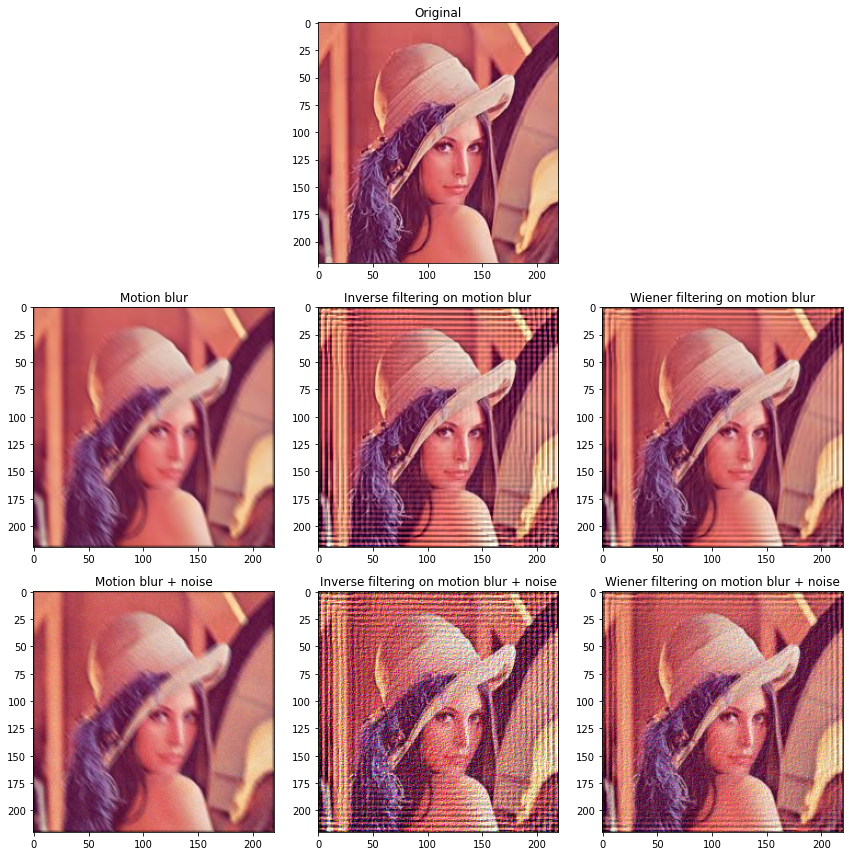

In [6]:
# Load
img6 = io.imread('./images/lena.jpg')
img6 = img_as_float(img6)
img6_fft = np.fft.fft2(img6, axes=(0, 1))
img6_fft_shift = np.fft.fftshift(img6_fft, axes=(0, 1))

# Motion blur
def motion_blur(img, k_size):
    height, width, channel = img.shape
    # Create a point spread function (psf)
    psf = np.diag([1] * k_size ).astype(np.float64)
    psf /= k_size
    # Pad zeros
    pads = k_size // 2
    padding = np.zeros((height + pads*2 + 1, width + pads*2 + 1, channel), dtype=np.float64)
    padding[pads: pads+height, pads: pads+width] = img.copy()

    # Blur
    blured = padding.copy()
    for y in range(height):
        for x in range(width):
            for c in range(channel):
                blured[pads+y, pads+x, c] = np.sum(psf * padding[y: y+k_size, x: x+k_size, c])
    # Keep the same size as the original image
    blured = blured[pads: pads+height, pads: pads+width]
    # The same size as the image
    PSF = np.pad(psf, (((height-k_size)//2, (height-k_size)//2+1), ((width-k_size)//2, (width-k_size)//2+1)), 'constant')
    return blured, PSF

# Inverse filter
def inverse_filter(blured_img, PSF):
    # Perform FFT on image and degradation function
    blured_img_fft = np.fft.fft2(blured_img, axes=(0, 1))
    PSF_fft = np.fft.fft2(PSF)

    # Filter
    W_fft = np.conj(PSF_fft) / (np.abs(PSF_fft)**2 + 0.001)
    filtered_fft = blured_img_fft.copy()
    for c in range(blured_img.shape[2]):
        filtered_fft[:, :, c] = blured_img_fft[:, :, c] * W_fft
    filtered = np.fft.ifftshift(np.fft.ifft2(filtered_fft, axes=(0, 1)), axes=(0, 1))
    filtered = np.clip(np.real(filtered), 0, 1)
    return filtered

# Wiener filter
def wiener_filter(blured_img, PSF, K=0.01):
    # Perform FFT on image and degradation function
    blured_img_fft = np.fft.fft2(blured_img, axes=(0, 1))
    PSF_fft = np.fft.fft2(PSF)
    
    # Filter
    W_fft = np.conj(PSF_fft) / (np.abs(PSF_fft)**2 + K)
    filtered_fft = blured_img_fft.copy()
    for c in range(blured_img.shape[2]):
        filtered_fft[:, :, c] = blured_img_fft[:, :, c] * W_fft
    filtered = np.fft.ifftshift(np.fft.ifft2(filtered_fft, axes=(0, 1)), axes=(0, 1))
    filtered = np.clip(np.real(filtered), 0, 1)
    return filtered

# Apply motion blur
img6_motion, PSF = motion_blur(img6, k_size=5)
# Add noise to the blurred image
noise = 0.1*img6_motion.std()*np.random.standard_normal(img6_motion.shape)
img6_motion_noise = img6_motion + noise
img6_motion_noise = np.clip(img6_motion_noise, 0, 1)

# Perform filter
img6_motion_inverse_filtered = inverse_filter(img6_motion, PSF)
img6_motion_wiener_filtered = wiener_filter(img6_motion, PSF)
img6_motion_noise_inverse_filtered = inverse_filter(img6_motion_noise, PSF)
img6_motion_noise_wiener_filtered = wiener_filter(img6_motion_noise, PSF)

plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 2)
plt.imshow(img6)
plt.title('Original')
plt.subplot(3, 3, 4)
plt.imshow(img6_motion)
plt.title('Motion blur')
plt.subplot(3, 3, 5)
plt.imshow(img6_motion_inverse_filtered)
plt.title('Inverse filtering on motion blur')
plt.subplot(3, 3, 6)
plt.imshow(img6_motion_wiener_filtered)
plt.title('Wiener filtering on motion blur')
plt.subplot(3, 3, 7)
plt.imshow(img6_motion_noise)
plt.title('Motion blur + noise')
plt.subplot(3, 3, 8)
plt.imshow(img6_motion_noise_inverse_filtered)
plt.title('Inverse filtering on motion blur + noise')
plt.subplot(3, 3, 9)
plt.imshow(img6_motion_noise_wiener_filtered)
plt.title('Wiener filtering on motion blur + noise')
plt.tight_layout()
plt.show()

<font size=3 color=red>The restored image here shows a severe distortion at the edges. This is due to the fact that the method of convolution with the blur kernel was taken when the motion blur was performed. And the result of the convolution is larger than the original image, and here only the same size as the original image is taken, which is the cause of the distortion.</font>

### (7) Homomorphic Filtering  (Bonus Task)
(a) Load the RGB image forest.jpg.

(b) Write a function to enhance a color image with homomorphic filtering to each of its color channels.

(c) Display the original image and the filtered image in the same figure with sub-figures. Add the corresponding title to the sub-figures.

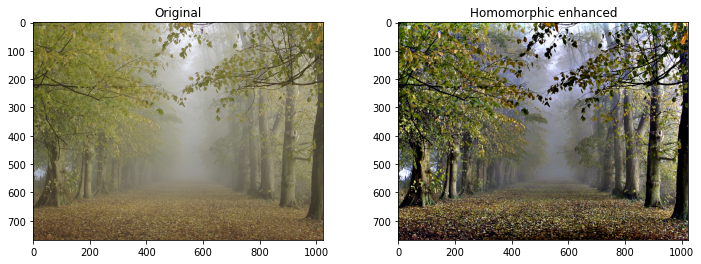

In [7]:
# Load
img7 = io.imread('./images/forest.jpg')
img7 = img_as_float(img7)

# Homomorphic enhance
def homomorphic_enhance(img, d0=10, rL=0.5, rH=2, c=4, h=2.0, l=0.5):
    enhanced_img = img.copy()
    # Each color channel
    for i in range(img.shape[2]):
        component = img[:, :, i].copy()
        height, width = component.shape
        # Take logarithm    
        component = np.log(component+1)
        # Perform FFT
        fft_ = np.fft.fft2(component)
        fft_shift = np.fft.fftshift(fft_)
        
        # Mesh two numpy arrays representing two axis variables
        height_center = height // 2
        width_center = width // 2
        u, v = np.meshgrid(np.arange(-width_center, width_center), np.arange(-height_center, height_center))
        # Distance from center
        dis2 = u**2 + v**2
        
        # Create filter
        homomorphic_filter_fft_shift = (rH - rL) * (1 - np.exp(-c * (dis2 / d0**2))) + rL
        # Enhance
        enhanced_fft_shift = homomorphic_filter_fft_shift * fft_shift
        enhanced_fft_shift = (h - l) * enhanced_fft_shift + l
        
        # Perform IFFT
        enhanced = np.fft.ifft2(np.fft.ifftshift(enhanced_fft_shift))
        # Take exponential
        enhanced = np.exp(enhanced) - 1
        # Obtain enhanced image
        enhanced = np.clip(np.real(enhanced), 0, 1)
        enhanced_img[:, :, i] = enhanced
    return enhanced_img

img7_enhanced = homomorphic_enhance(img7)

plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.imshow(img7)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(img7_enhanced)
plt.title('Homomorphic enhanced')
plt.show()

## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.